# **_Time Series Prediction_**
### __*Testing Different Methods of Time Series Prediction*__

<br>

### __*Import Libraries*__
### __*[DataTable](https://datatable.readthedocs.io/en/latest/start/quick-start.html)*__

In [38]:
# Datasets
import datatable as dt
import matplotlib.pyplot as plt

# Torch libraries
import torch
from torch import nn, optim
from sklearn.model_selection import train_test_split

# Device config
device = torch.device('cpu')
if torch.cuda.is_available():
    device = torch.device('cuda')
if torch.has_mps:
    device = torch.device('mps')
print('Using the Processor') if device == torch.device('cpu') else print('Using the Graphics Card')

Using the Graphics Card


<br>

### __*Prepare & Show Weather Data*__

In [39]:
# Show structure of dataset
weather_raw = dt.fread('data/seattle-weather.csv').to_pandas()
weather_raw.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


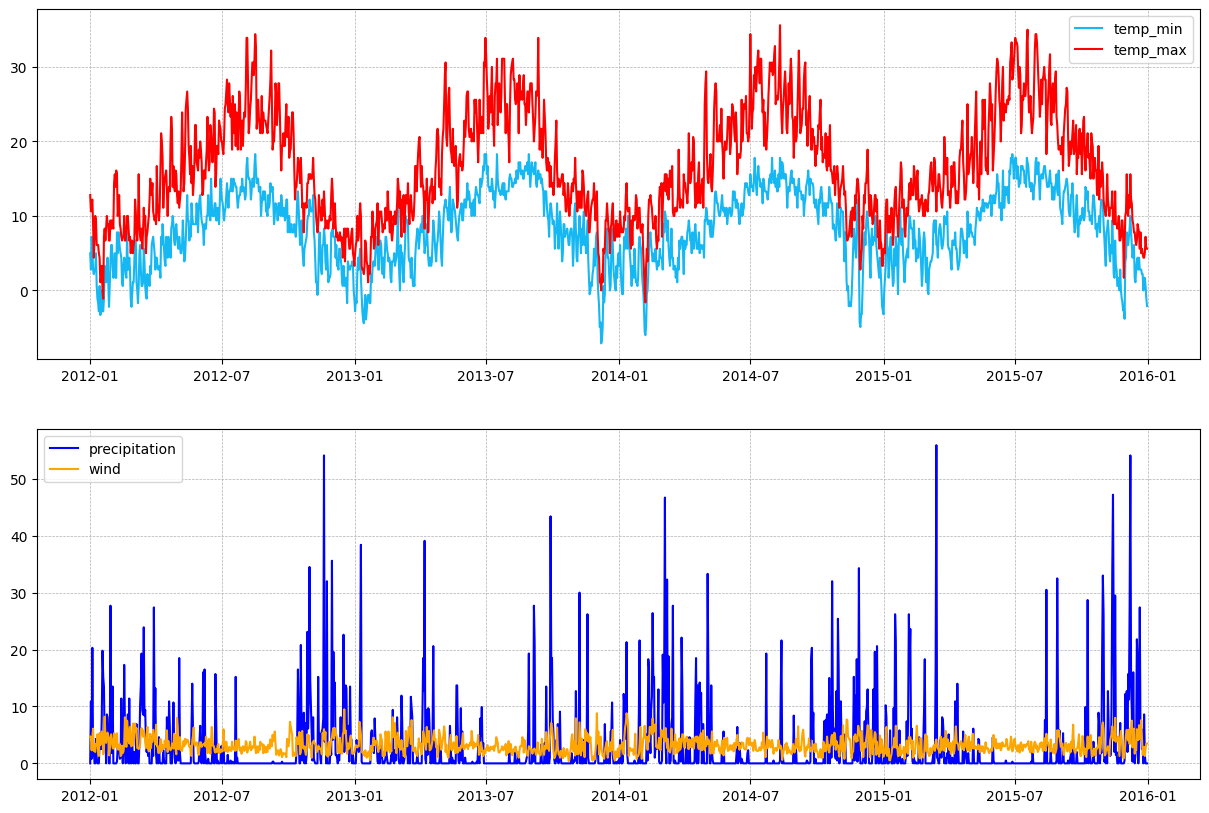

In [40]:
# Create a plot
fig_weather, axs_weather = plt.subplots(nrows=2, ncols=1, figsize=[15,10])

min_plot, = axs_weather[0].plot(weather_raw['date'], weather_raw['temp_min'],
                                label='temp_min', color='#16b8f3')
max_plot, = axs_weather[0].plot(weather_raw['date'], weather_raw['temp_max'],
                                label='temp_max', color='red')

precipitation, = axs_weather[1].plot(weather_raw['date'], weather_raw['precipitation'],
                                     label='precipitation', color='blue')
wind_plot, = axs_weather[1].plot(weather_raw['date'], weather_raw['wind'],
                                 label='wind', color='orange')

axs_weather[0].grid(linestyle='--', linewidth=0.5)
axs_weather[0].legend(handles=[min_plot, max_plot])
axs_weather[1].grid(linestyle='--', linewidth=0.5)
axs_weather[1].legend(handles=[precipitation, wind_plot])
pass

<br>

### __*Prepare & Show Google Stock Data*__

In [41]:
# Show structure of dataset
goog_raw = dt.fread('data/GOOG.csv').to_pandas()
goog_raw.head()

,symbol,date,close,high,low,open,volume,adjClose,adjHigh,adjLow,adjOpen,adjVolume,divCash,splitFactor
0,GOOG,2016-06-14,718.27,722.47,713.1200,716.48,1306065,718.27,722.47,713.1200,716.48,1306065,False,True
1,GOOG,2016-06-15,718.92,722.98,717.3100,719.00,1214517,718.92,722.98,717.3100,719.00,1214517,False,True
2,GOOG,2016-06-16,710.36,716.65,703.2600,714.91,1982471,710.36,716.65,703.2600,714.91,1982471,False,True
3,GOOG,2016-06-17,691.72,708.82,688.4515,708.65,3402357,691.72,708.82,688.4515,708.65,3402357,False,True
4,GOOG,2016-06-20,693.71,702.48,693.4100,698.77,2082538,693.71,702.48,693.4100,698.77,2082538,False,True


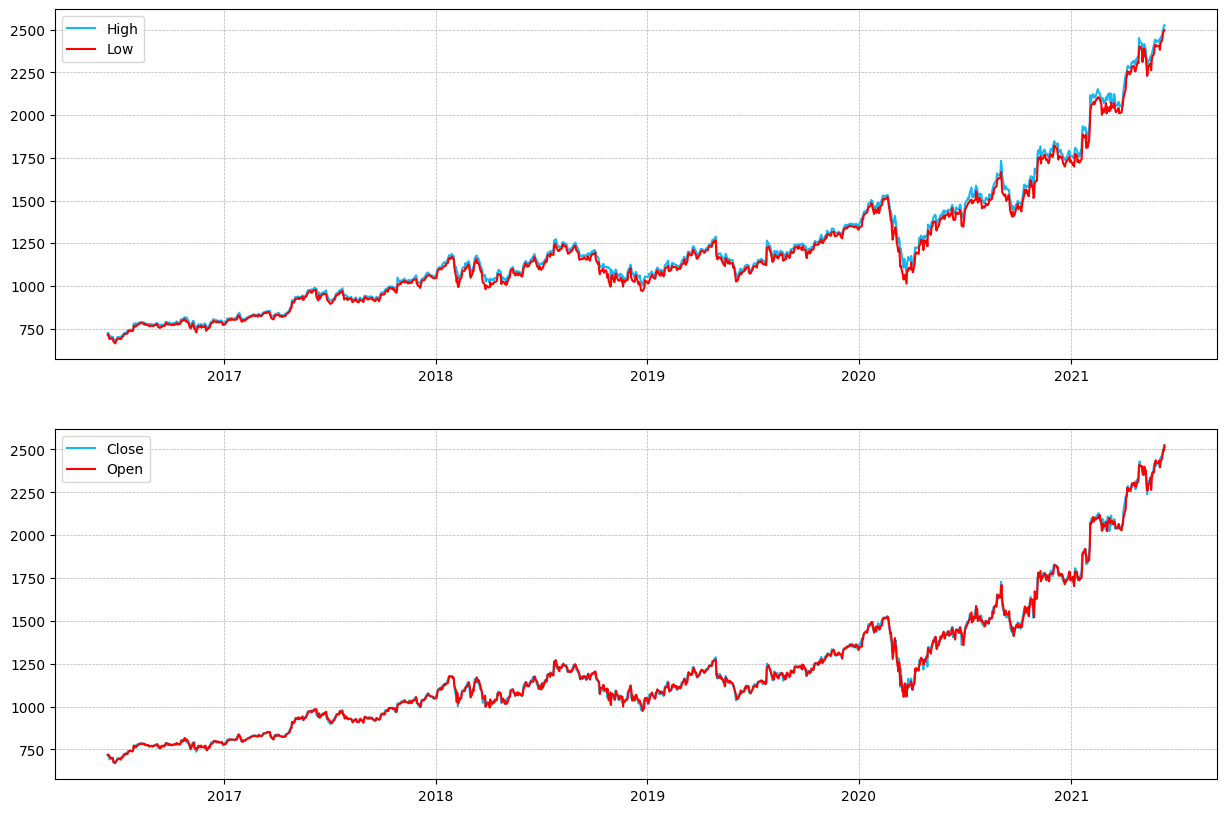

In [42]:
# Create a plot
fig_goog, axs_goog = plt.subplots(nrows=2, ncols=1, figsize=[15,10])

close_plot, = axs_goog[1].plot(goog_raw['date'], goog_raw['close'],
                               label='Close', color='#16b8f3')
high_plot, = axs_goog[0].plot(goog_raw['date'], goog_raw['high'],
                              label='High', color='#16b8f3')
low_plot, = axs_goog[0].plot(goog_raw['date'], goog_raw['low'],
                             label='Low', color='red')
open_plot, = axs_goog[1].plot(goog_raw['date'], goog_raw['open'],
                              label='Open', color='red')

axs_goog[0].grid(linestyle='--', linewidth=0.5)
axs_goog[0].legend(handles=[high_plot, low_plot])
axs_goog[1].grid(linestyle='--', linewidth=0.5)
axs_goog[1].legend(handles=[close_plot, open_plot])
pass

<br>

### __*Prepare & Show NASDAQ Stock Data*__

In [43]:
# Show structure of dataset
nasdaq_raw = dt.fread('data/NASDAQ.csv').to_pandas()
nasdaq_raw.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1971-02-05,100.000000,100.000000,100.000000,100.000000,100.000000,0
1,1971-02-08,100.839996,100.839996,100.839996,100.839996,100.839996,0
2,1971-02-09,100.760002,100.760002,100.760002,100.760002,100.760002,0
3,1971-02-10,100.690002,100.690002,100.690002,100.690002,100.690002,0
4,1971-02-11,101.449997,101.449997,101.449997,101.449997,101.449997,0


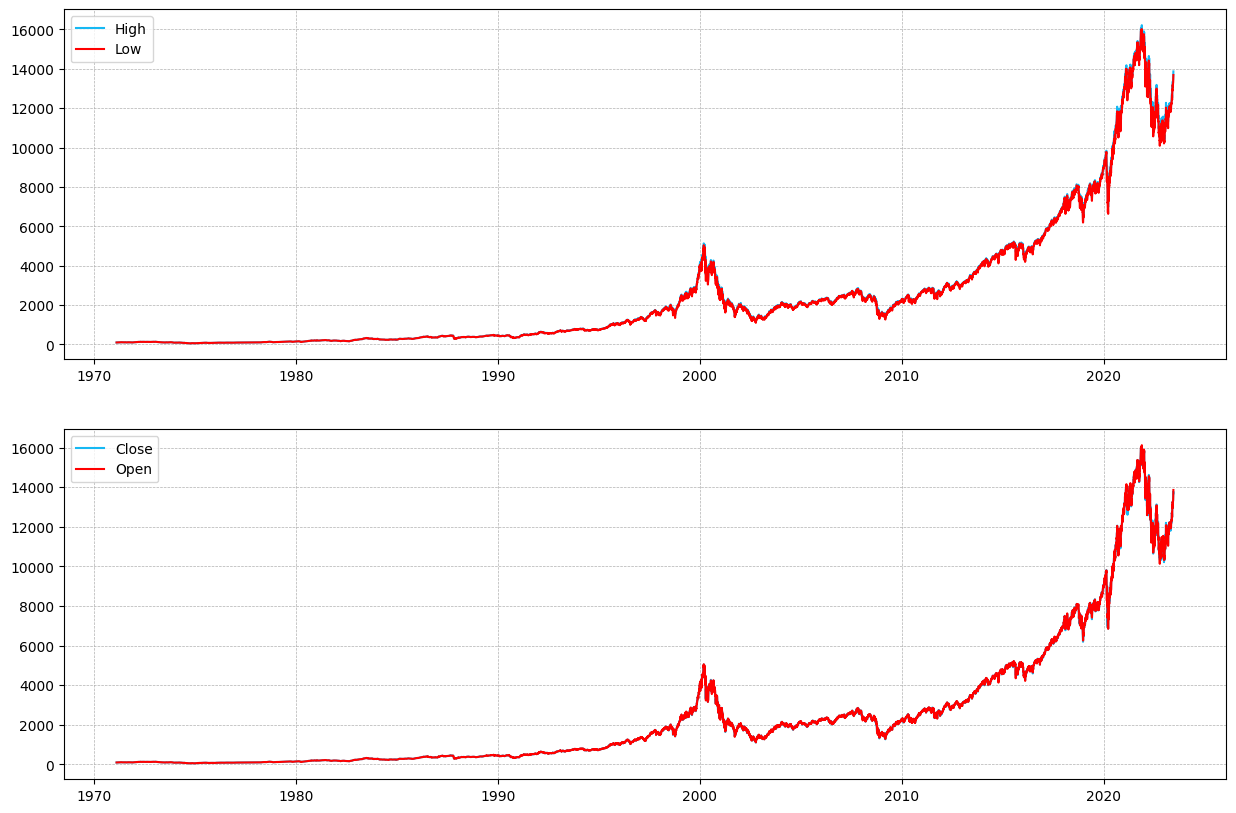

In [44]:
# Create a plot
fig_nasdaq, axs_nasdaq = plt.subplots(nrows=2, ncols=1, figsize=[15,10])

close_plot, = axs_nasdaq[1].plot(nasdaq_raw['Date'], nasdaq_raw['Close'],
                               label='Close', color='#16b8f3')
high_plot, = axs_nasdaq[0].plot(nasdaq_raw['Date'], nasdaq_raw['High'],
                              label='High', color='#16b8f3')
low_plot, = axs_nasdaq[0].plot(nasdaq_raw['Date'], nasdaq_raw['Low'],
                             label='Low', color='red')
open_plot, = axs_nasdaq[1].plot(nasdaq_raw['Date'], nasdaq_raw['Open'],
                              label='Open', color='red')

axs_nasdaq[0].grid(linestyle='--', linewidth=0.5)
axs_nasdaq[0].legend(handles=[high_plot, low_plot])
axs_nasdaq[1].grid(linestyle='--', linewidth=0.5)
axs_nasdaq[1].legend(handles=[close_plot, open_plot])
pass

<br>

### __*Prepare dataset*__

In [45]:
goog_data = goog_raw[['close', 'high', 'low', 'open', 'volume']].to_numpy()

In [46]:
goog_X = list()     # data
goog_y = list()     # labels

time_frame = 1      # length of data stream

# data transformation TODO: add normalisation
for idx in range(len(goog_data) - time_frame):
    tmp_lst = list()
    for num in range(time_frame):
        for info in goog_data[idx + num]:
            tmp_lst.append(info)

    goog_X.append(tmp_lst)
    if goog_data[idx + time_frame][0] > goog_data[idx][0]:
        goog_y.append(1)
    else:
        goog_y.append(0)

test = 3
print(goog_X[test][-5],goog_X[test+1][-5], goog_y[test])

691.72 693.71 1


In [47]:
# Split dataset into training and testing data
X_train, X_test, y_train, y_test = train_test_split(goog_X, goog_y, test_size=0.1, shuffle=False)

In [48]:
# Turn data into Torch Format
X_train = torch.Tensor(X_train)
y_train = torch.Tensor(y_train)

X_test = torch.Tensor(X_test)
y_test = torch.Tensor(y_test)

<br>

### __*Create the Model*__

In [49]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super(LinearRegression, self).__init__()
        self.fc1 = nn.Linear(input_size, 16)  # next try 16
        self.fc4 = nn.Linear(16, output_size)

    def forward(self, xx):
        xx = torch.sigmoid(self.fc1(xx))
        return torch.sigmoid(self.fc4(xx))

In [50]:
model = LinearRegression(len(goog_X[0]), 1)

loss_lst = list()
accuracy = list()

In [54]:
num_epochs = 100
len_train = len(X_train)
split = 36

criterion = nn.L1Loss()                                 # L1Loss, MSELoss
optimizer = optim.AdamW(model.parameters(), lr=0.0001)  # AdamW 0.0001

for epoch in range(num_epochs):
    total_loss = 0
    for delta in range(split):
        inputs = X_train[int(len_train/split)*delta:int(len_train/split)*delta+1]
        targets = y_train[int(len_train/split)*delta:int(len_train/split)*delta+1]

        # Forward pass
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        # Backward and optimize
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if (epoch+1) % 1 == 0:
            total_loss += loss.item()

    if (epoch+1) % 1 == 0:
        loss_lst.append(total_loss/split)

        predictions = model(X_test)
        acc = criterion(predictions, y_test)
        accuracy.append(acc.item())
        print(f"Epoch {epoch+1}/{num_epochs}| Loss: {total_loss/split}| Test Loss: {acc.item()}")

        total_loss = 0

C:\Users\rposa\anaconda3\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
C:\Users\rposa\anaconda3\lib\site-packages\torch\nn\modules\loss.py:101: UserWarning: Using a target size (torch.Size([126])) that is different to the input size (torch.Size([126, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch 1/100| Loss: 0.8643999480538898| Test Loss: 0.9417430758476257
Epoch 2/100| Loss: 0.8638118869728513| Test Loss: 0.9414945244789124
Epoch 3/100| Loss: 0.8632300198078156| Test Loss: 0.9412449598312378
Epoch 4/100| Loss: 0.8626470946603351| Test Loss: 0.9409949779510498
Epoch 5/100| Loss: 0.8620630701382955| Test Loss: 0.9407443404197693
Epoch 6/100| Loss: 0.8614779661099116| Test Loss: 0.9404932856559753
Epoch 7/100| Loss: 0.8608918454911973| Test Loss: 0.9402419328689575
Epoch 8/100| Loss: 0.8603046966923608| Test Loss: 0.9399901032447815
Epoch 9/100| Loss: 0.8597165611055162| Test Loss: 0.9397376775741577
Epoch 10/100| Loss: 0.8591274635659324| Test Loss: 0.9394850730895996
Epoch 11/100| Loss: 0.8585374570555158| Test Loss: 0.9392319321632385
Epoch 12/100| Loss: 0.8579466177357568| Test Loss: 0.9389786124229431
Epoch 13/100| Loss: 0.8573549853430854| Test Loss: 0.9387247562408447
Epoch 14/100| Loss: 0.8567625830570856| Test Loss: 0.9384707808494568
Epoch 15/100| Loss: 0.8561693

Predictions:
True: -1.0, Predicted: 0.40622857213020325
True: 1.0, Predicted: 0.40622857213020325
True: -1.0, Predicted: 0.40622857213020325
True: 1.0, Predicted: 0.40622857213020325
True: -1.0, Predicted: 0.40622857213020325
True: -1.0, Predicted: 0.40622857213020325
True: -1.0, Predicted: 0.40622857213020325
True: 1.0, Predicted: 0.40622857213020325
True: -1.0, Predicted: 0.40622857213020325
True: 1.0, Predicted: 0.40622857213020325
True: 1.0, Predicted: 0.40622857213020325
True: 1.0, Predicted: 0.40622857213020325
True: -1.0, Predicted: 0.40622857213020325
True: -1.0, Predicted: 0.40622857213020325
True: 1.0, Predicted: 0.40622857213020325
True: -1.0, Predicted: 0.40622857213020325
True: 1.0, Predicted: 0.40622857213020325
True: -1.0, Predicted: 0.40622857213020325
True: 1.0, Predicted: 0.40622857213020325
True: 1.0, Predicted: 0.40622857213020325
True: -1.0, Predicted: 0.40622857213020325
True: -1.0, Predicted: 0.40622857213020325
True: 1.0, Predicted: 0.40622857213020325
True: -1.

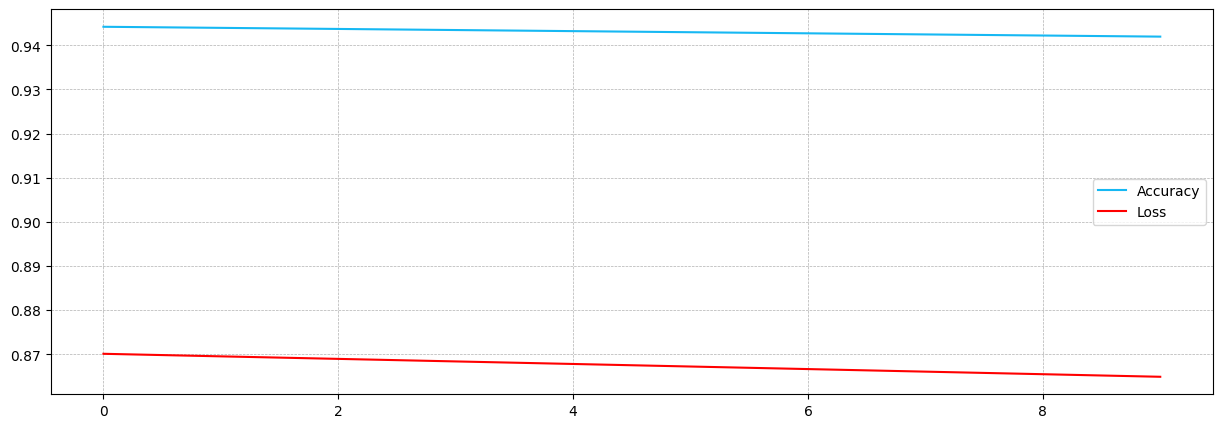

In [52]:
# Graphical representation of the learning process
fig_loss, axs_loss = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
accuracy_plot, = axs_loss.plot(accuracy, label='Accuracy', color='#16b8f3')
loss_lst_plot, = axs_loss.plot(loss_lst, label='Loss', color='red')
axs_loss.grid(linestyle='--', linewidth=0.5)
axs_loss.legend(handles=[accuracy_plot, loss_lst_plot])

predictions = model(X_test)

print("Predictions:")
for i, x in enumerate(X_test):
    print(f"True: {y_test[i]}, Predicted: {predictions[i][0]}")

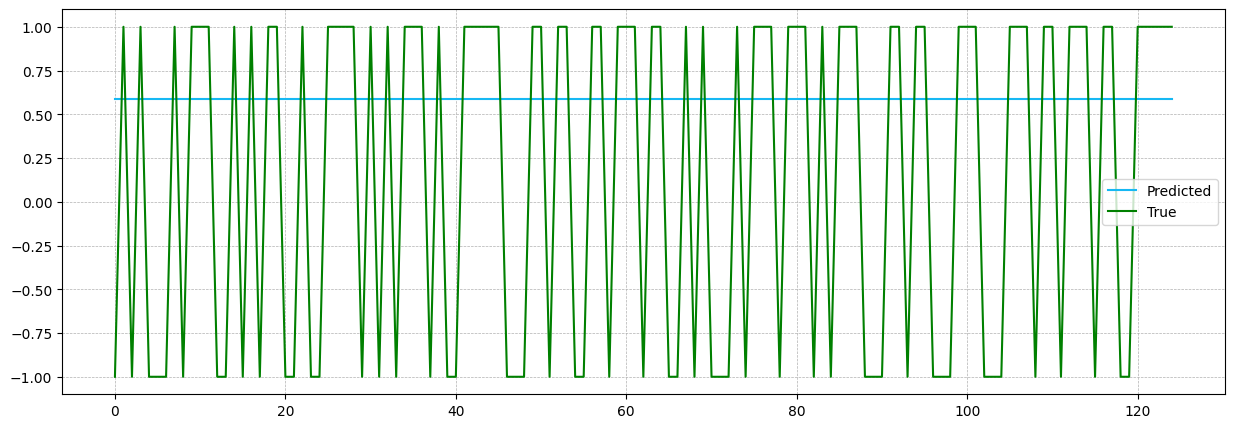

In [55]:
# Graphical representation of the model accuracy
start = 0
end = -1

fig_loss, axs_loss = plt.subplots(nrows=1, ncols=1, figsize=[15,5])
accuracy_plot, = axs_loss.plot(predictions.detach().numpy()[start:end], label='Predicted', color='#16b8f3')
loss_lst_plot, = axs_loss.plot(y_test[start:end], label='True', color='green')
axs_loss.grid(linestyle='--', linewidth=0.5)
axs_loss.legend(handles=[accuracy_plot, loss_lst_plot])
pass